In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
def ingest(path):
    data = pd.read_csv(path)
    print('dataset loaded with shape', data.shape)    
    return data
data = ingest('Categories.csv')

dataset loaded with shape (14, 105)


In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
data=data.set_index("Category").T

In [4]:
data=data.rename(columns={'Clarity of Direction': 'CD', 'Manager Effectiveness': 'ME', 'Empowerment': 'EP','Pride in Company': 'PC', 
                          'Continuous Improvement': 'CI','Teamwork': 'TW','Development and Opportunities for Advancement': 'DO',
                         'Resources and Support': 'RS','Engagement': 'EE','Leadership': 'LS','Communication': 'CO','MTMP Index': 'MI',
                          'Growth Mindset Index': 'GM','Recognition and Reward': 'RR'})

In [5]:
data.head(2)

Category,CD,ME,EP,PC,CI,TW,DO,RS,EE,LS,CO,MI,GM,RR
"BEIJING HITACHI CONTROL SYSTEMS CO., LTD.",60.4,68.9,61.4,56.8,35.4,75.8,40.4,41.9,53.2,51.4,67.9,46.3,45.6,42.6
CUMULUS SYSTEMS PRIVATE LIMITED,84.4,83.6,81.6,87.4,82.1,89.3,75.9,82.3,82.5,87.6,86.5,83.3,81.4,80.5


In [6]:
description_df=data.describe()

In [7]:
description_df

Category,CD,ME,EP,PC,CI,TW,DO,RS,EE,LS,CO,MI,GM,RR
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,63.103846,67.170192,68.523077,68.157692,56.077885,67.673077,57.961538,47.514423,62.500000,63.242308,65.288462,60.148077,61.142308,58.425962
std,12.965855,9.983898,9.786668,12.890628,13.550223,11.871384,12.208769,17.905531,14.442528,13.590028,11.364058,12.510035,11.511511,11.399063
min,32.800000,33.300000,31.400000,22.200000,18.600000,28.200000,10.000000,16.900000,21.800000,33.800000,35.700000,21.600000,21.300000,17.100000
25%,53.875000,60.950000,62.250000,59.125000,46.400000,59.050000,49.250000,32.600000,52.450000,52.925000,56.775000,51.150000,53.275000,51.900000
50%,60.750000,66.100000,66.300000,67.900000,52.800000,66.350000,57.000000,43.150000,59.550000,60.650000,64.300000,57.150000,59.050000,58.350000
75%,70.875000,72.425000,73.900000,77.575000,65.125000,75.975000,65.450000,60.000000,73.875000,72.475000,71.675000,68.225000,68.200000,65.050000
max,96.800000,91.700000,100.000000,100.000000,85.200000,95.200000,85.700000,90.500000,98.200000,97.100000,96.400000,91.400000,86.800000,81.400000


In [8]:
description_df.transpose()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
CD,104.0,63.103846,12.965855,32.8,53.875,60.75,70.875,96.8
ME,104.0,67.170192,9.983898,33.3,60.950,66.10,72.425,91.7
EP,104.0,68.523077,9.786668,31.4,62.250,66.30,73.900,100.0
PC,104.0,68.157692,12.890628,22.2,59.125,67.90,77.575,100.0
CI,104.0,56.077885,13.550223,18.6,46.400,52.80,65.125,85.2
TW,104.0,67.673077,11.871384,28.2,59.050,66.35,75.975,95.2
DO,104.0,57.961538,12.208769,10.0,49.250,57.00,65.450,85.7
RS,104.0,47.514423,17.905531,16.9,32.600,43.15,60.000,90.5
EE,104.0,62.500000,14.442528,21.8,52.450,59.55,73.875,98.2


In [9]:
data.corr(method ='pearson') 

Category,CD,ME,EP,PC,CI,TW,DO,RS,EE,LS,CO,MI,GM,RR
Category,,,,,,,,,,,,,,
CD,1.000000,0.873331,0.874331,0.938627,0.934816,0.878703,0.857716,0.859876,0.947225,0.973290,0.905139,0.963140,0.918474,0.812785
ME,0.873331,1.000000,0.877127,0.861640,0.868272,0.849600,0.879951,0.771338,0.854680,0.863759,0.911519,0.899204,0.891075,0.816940
EP,0.874331,0.877127,1.000000,0.889589,0.876380,0.892312,0.903476,0.828386,0.897996,0.872931,0.850020,0.923502,0.899868,0.794565
PC,0.938627,0.861640,0.889589,1.000000,0.913097,0.883817,0.864873,0.826487,0.971480,0.949587,0.850489,0.948507,0.908847,0.826708
CI,0.934816,0.868272,0.876380,0.913097,1.000000,0.873001,0.902466,0.890525,0.927016,0.958291,0.878991,0.980657,0.979999,0.826052
TW,0.878703,0.849600,0.892312,0.883817,0.873001,1.000000,0.865815,0.892656,0.912209,0.887160,0.813735,0.912778,0.905416,0.743310
DO,0.857716,0.879951,0.903476,0.864873,0.902466,0.865815,1.000000,0.835154,0.886009,0.861604,0.858249,0.924027,0.937647,0.853162
RS,0.859876,0.771338,0.828386,0.826487,0.890525,0.892656,0.835154,1.000000,0.891822,0.895205,0.774473,0.895178,0.875363,0.698094
EE,0.947225,0.854680,0.897996,0.971480,0.927016,0.912209,0.886009,0.891822,1.000000,0.963087,0.827991,0.955407,0.922267,0.787330


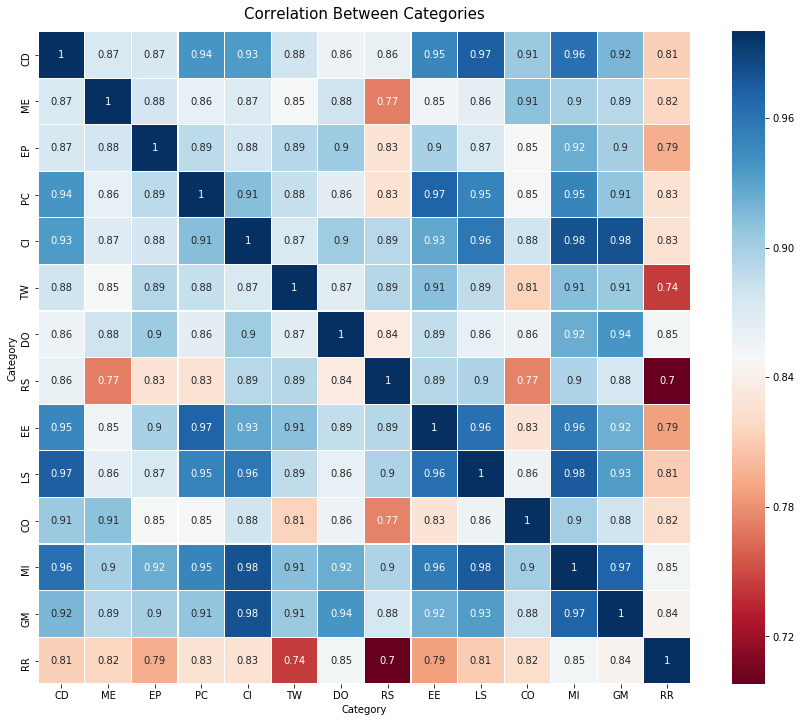

In [10]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,12))
plt.title("Correlation Between Categories", y=1.01, size=15)
sns.heatmap(data.corr(), cmap=colormap, linecolor='white',square=True,linewidths=0.1, annot=True)
plt.savefig('heatmap.jpg', bbox_inches = "tight")

### Regression

\begin{align}
EE & = \beta_0 X_0 + \beta_1 X_1
\end{align}

In [11]:
X=data[['CD','ME','EP','PC','CI','TW','DO','RS','LS','CO','MI','GM','RR']]

y= data['EE']

In [12]:
X.head(2)

Category,CD,ME,EP,PC,CI,TW,DO,RS,LS,CO,MI,GM,RR
"BEIJING HITACHI CONTROL SYSTEMS CO., LTD.",60.4,68.9,61.4,56.8,35.4,75.8,40.4,41.9,51.4,67.9,46.3,45.6,42.6
CUMULUS SYSTEMS PRIVATE LIMITED,84.4,83.6,81.6,87.4,82.1,89.3,75.9,82.3,87.6,86.5,83.3,81.4,80.5


In [13]:
y.head(2)

BEIJING HITACHI CONTROL SYSTEMS CO., LTD.    53.2
CUMULUS SYSTEMS PRIVATE LIMITED              82.5
Name: EE, dtype: float64

In [14]:
X_constant = sm.add_constant(X)

In [15]:
model = sm.OLS(y, X_constant)
lin_reg = model.fit()

In [16]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EE   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     377.5
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           1.79e-72
Time:                        11:06:23   Log-Likelihood:                -215.89
No. Observations:                 104   AIC:                             459.8
Df Residuals:                      90   BIC:                             496.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5563      2.354     -2.361      0.020     -10.232      -0.880
CD             0.3673      0.094      3.891      0.000       0.180       0.555
ME             0.0694      0.064      1.086      0.281      -0.058       0.196
EP             0.0880      0.069      1.274      0.206      -0.049       0.225
PC             0.6747      0.061     11.022      0.000       0.553       0.796
CI             0.2022      0.156      1.299      0.197      -0.107       0.511
TW             0.0774      0.066      1.167      0.246      -0.054       0.209
DO             0.2702      0.064      4.190      0.000       0.142       0.398
RS             0.1182      0.037      3.222      0.002       0.045       0.191
LS             0.1166      0.124      0.938      0.351      -0.130       0.364
CO            -0.2753      0.064     -4.278      0.000      -0.403      -0.147
MI            -0.4060      0.196     -2.067      0.042      -0.796      -0.016
GM            -0.1359      0.146     -0.929      0.355      -0.426       0.155
RR            -0.1082      0.041     -2.661      0.009      -0.189      -0.027
==============================================================================
Omnibus:                       17.124   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.474
Skew:                           0.833   Prob(JB):                     1.32e-05
Kurtosis:                       4.552   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""